[INFO] DJI     : 161 files (drone)
[INFO] PHANTOM : 254 files (drone)
[INFO] NOISE   : 657 files (no-drone)
[INFO] TOTAL   : 1072 files

Evaluating model: /home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_orignal.keras  (threshold=0.5)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step
[OVERALL] N=1072
  Accuracy : 0.8815
  F1       : 0.8515
  AUROC    : 0.9576
  AUPRC    : 0.9380


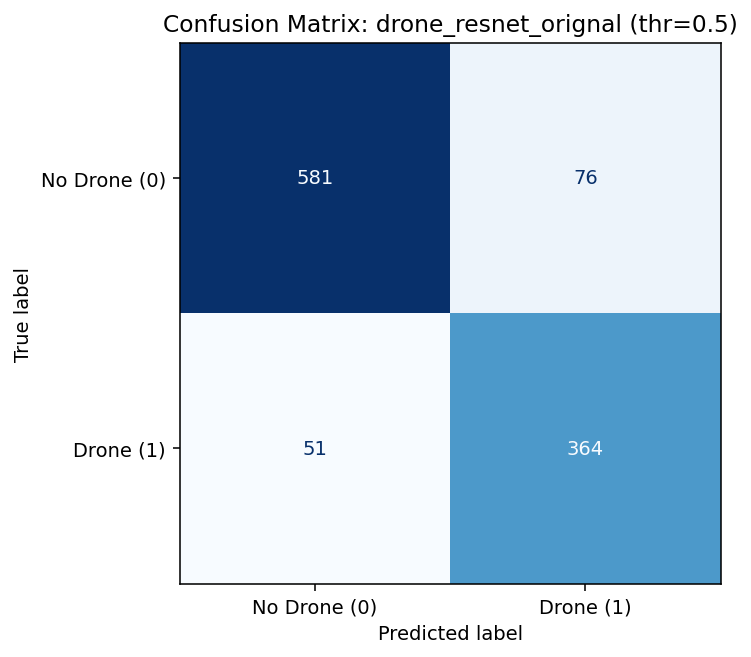

Confusion Matrix (rows=true [0=no-drone, 1=drone], cols=pred [0,1]):
[[581  76]
 [ 51 364]]

Classification Report:
              precision    recall  f1-score   support

    No Drone       0.92      0.88      0.90       657
       Drone       0.83      0.88      0.85       415

    accuracy                           0.88      1072
   macro avg       0.87      0.88      0.88      1072
weighted avg       0.88      0.88      0.88      1072


Evaluating model: /home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_data_01.keras  (threshold=0.5)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step
[OVERALL] N=1072
  Accuracy : 0.8713
  F1       : 0.8526
  AUROC    : 0.9589
  AUPRC    : 0.9311


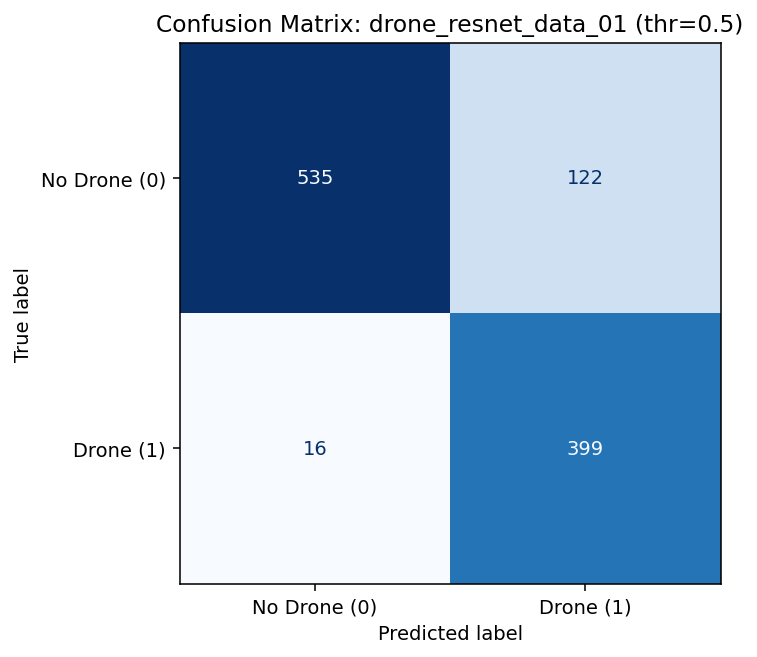

Confusion Matrix (rows=true [0=no-drone, 1=drone], cols=pred [0,1]):
[[535 122]
 [ 16 399]]

Classification Report:
              precision    recall  f1-score   support

    No Drone       0.97      0.81      0.89       657
       Drone       0.77      0.96      0.85       415

    accuracy                           0.87      1072
   macro avg       0.87      0.89      0.87      1072
weighted avg       0.89      0.87      0.87      1072


Evaluating model: /home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_data_02.keras  (threshold=0.5)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step
[OVERALL] N=1072
  Accuracy : 0.8125
  F1       : 0.8031
  AUROC    : 0.9770
  AUPRC    : 0.9682


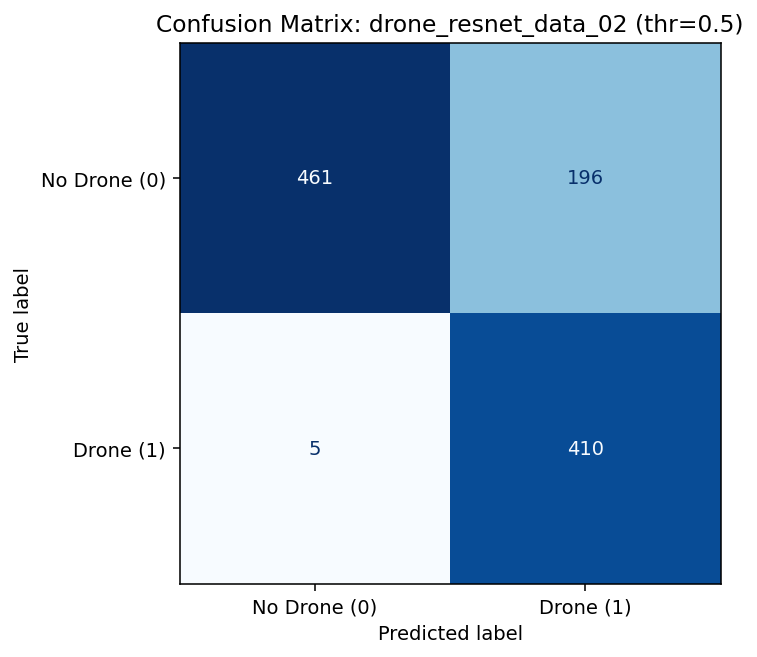

Confusion Matrix (rows=true [0=no-drone, 1=drone], cols=pred [0,1]):
[[461 196]
 [  5 410]]

Classification Report:
              precision    recall  f1-score   support

    No Drone       0.99      0.70      0.82       657
       Drone       0.68      0.99      0.80       415

    accuracy                           0.81      1072
   macro avg       0.83      0.84      0.81      1072
weighted avg       0.87      0.81      0.81      1072


Evaluating model: /home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_smoothing_AdamW.keras  (threshold=0.5)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step
[OVERALL] N=1072
  Accuracy : 0.8853
  F1       : 0.8707
  AUROC    : 0.9904
  AUPRC    : 0.9854


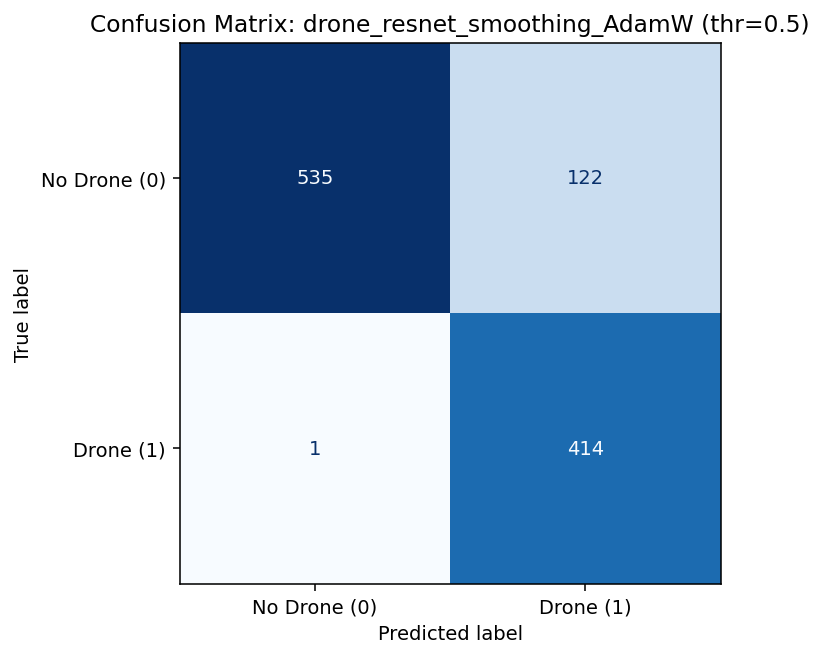

Confusion Matrix (rows=true [0=no-drone, 1=drone], cols=pred [0,1]):
[[535 122]
 [  1 414]]

Classification Report:
              precision    recall  f1-score   support

    No Drone       1.00      0.81      0.90       657
       Drone       0.77      1.00      0.87       415

    accuracy                           0.89      1072
   macro avg       0.89      0.91      0.88      1072
weighted avg       0.91      0.89      0.89      1072


Evaluating model: /home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_SE_Aug.keras  (threshold=0.5)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
[OVERALL] N=1072
  Accuracy : 0.8853
  F1       : 0.8638
  AUROC    : 0.9680
  AUPRC    : 0.9674


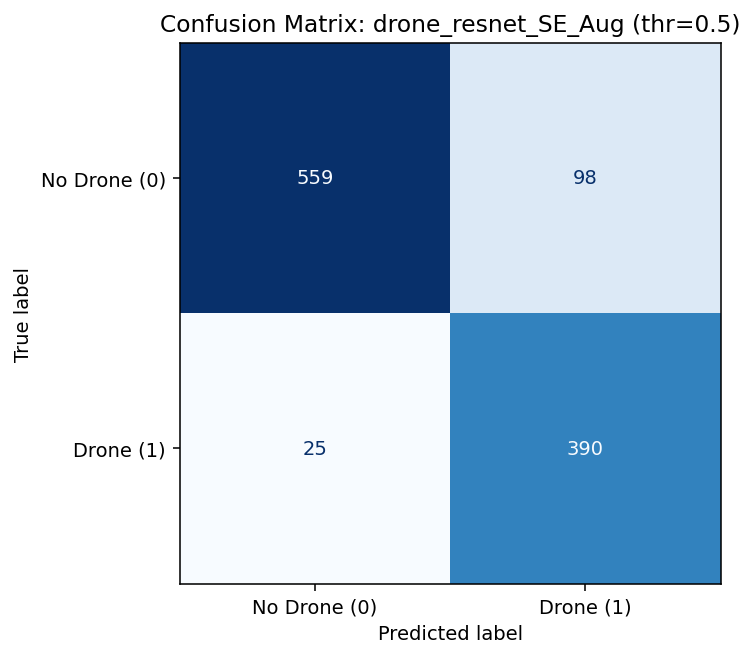

Confusion Matrix (rows=true [0=no-drone, 1=drone], cols=pred [0,1]):
[[559  98]
 [ 25 390]]

Classification Report:
              precision    recall  f1-score   support

    No Drone       0.96      0.85      0.90       657
       Drone       0.80      0.94      0.86       415

    accuracy                           0.89      1072
   macro avg       0.88      0.90      0.88      1072
weighted avg       0.90      0.89      0.89      1072


Evaluating model: /home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_final_form.keras  (threshold=0.5)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
[OVERALL] N=1072
  Accuracy : 0.8918
  F1       : 0.8714
  AUROC    : 0.9780
  AUPRC    : 0.9726


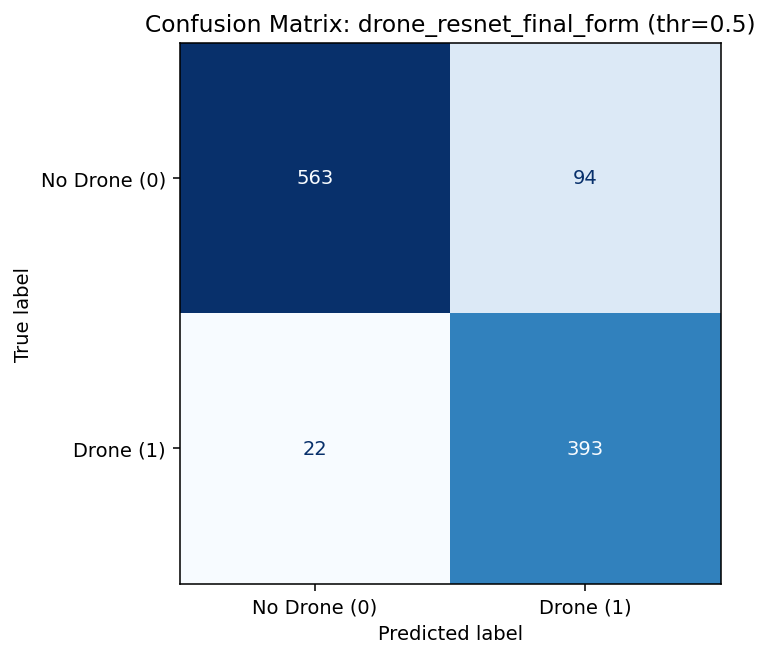

Confusion Matrix (rows=true [0=no-drone, 1=drone], cols=pred [0,1]):
[[563  94]
 [ 22 393]]

Classification Report:
              precision    recall  f1-score   support

    No Drone       0.96      0.86      0.91       657
       Drone       0.81      0.95      0.87       415

    accuracy                           0.89      1072
   macro avg       0.88      0.90      0.89      1072
weighted avg       0.90      0.89      0.89      1072



In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,
    precision_recall_curve, auc, f1_score, accuracy_score,
    classification_report
)

import matplotlib.pyplot as plt
from IPython.display import display

# =========================
#           PATHS
# =========================
DJI_PATH     = r"/home/destrox-907/Husnian_FYP/Dataset/Validation Dataset/DJI MAVIC 2"
PHANTOM_PATH = r"/home/destrox-907/Husnian_FYP/Dataset/Validation Dataset/Phantom"
NOISE_PATH   = r"/home/destrox-907/Husnian_FYP/Dataset/Validation Dataset/Acoustic Print GR Noise Audio_MFCC"

# Per-model decision thresholds
MODEL_THRESHOLDS = {
    "/home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_orignal.keras":      0.50,
    "/home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_data_01.keras":      0.5,
    "/home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_data_02.keras":      0.5,
    "/home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_smoothing_AdamW.keras": 0.50,
    "/home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_SE_Aug.keras":       0.50,
    "/home/destrox-907/Husnian_FYP/AI_Code Files/Testing Models/drone_resnet_final_form.keras":   0.50,
}

INPUT_SHAPE = (13, 40, 1)
BATCH_SIZE  = 1024  # adjust if GPU RAM is tight

# =========================
#     DATA LOADING
# =========================
def collect_npy_paths(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(".npy"):
                paths.append(os.path.join(r, f))
    return sorted(paths)

def load_all_paths_and_labels():
    dji_paths     = collect_npy_paths(DJI_PATH)
    phantom_paths = collect_npy_paths(PHANTOM_PATH)
    noise_paths   = collect_npy_paths(NOISE_PATH)

    # labels: DJI + PHANTOM are drone (1); NOISE is no-drone (0)
    all_paths  = np.array(dji_paths + phantom_paths + noise_paths)
    all_labels = np.array(
        [1]*len(dji_paths) + [1]*len(phantom_paths) + [0]*len(noise_paths),
        dtype=np.int32
    )

    print(f"[INFO] DJI     : {len(dji_paths)} files (drone)")
    print(f"[INFO] PHANTOM : {len(phantom_paths)} files (drone)")
    print(f"[INFO] NOISE   : {len(noise_paths)} files (no-drone)")
    print(f"[INFO] TOTAL   : {len(all_paths)} files")
    return all_paths, all_labels

def npy_loader(path):
    p = path.decode("utf-8")
    try:
        arr = np.load(p)
        arr = np.array(arr, dtype="float32")
        arr = np.reshape(arr, INPUT_SHAPE)  # enforce (13,40,1)
        return arr
    except Exception as e:
        print(f"[WARN] Failed to load {p}: {e}")
        # Return a harmless all-zeros MFCC tile
        return np.zeros(INPUT_SHAPE, dtype="float32")

def tf_load(path, label):
    x = tf.numpy_function(npy_loader, [path], Tout=tf.float32)
    x = tf.ensure_shape(x, INPUT_SHAPE)
    y = tf.one_hot(label, 2)  # for consistent mapping, not used in loss
    return x, y

def make_dataset(all_paths, all_labels, batch=BATCH_SIZE):
    ds = tf.data.Dataset.from_tensor_slices((all_paths, all_labels))
    ds = ds.map(tf_load, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch).prefetch(tf.data.AUTOTUNE)
    return ds

# =========================
#   CONFUSION MATRIX PLOT
# =========================
def plot_cm_inline(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    fig, ax = plt.subplots(figsize=(5.6, 4.8), dpi=140)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["No Drone (0)", "Drone (1)"]
    )
    disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=False)
    ax.set_title(title)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.tight_layout()
    display(fig)     # show this figure inline immediately
    plt.close(fig)   # free the figure so the next one is independent
    return cm

# =========================
#            RUN
# =========================
all_paths, all_labels = load_all_paths_and_labels()
ds_all = make_dataset(all_paths, all_labels)

for model_path, thr in MODEL_THRESHOLDS.items():
    print("\n" + "="*90)
    print(f"Evaluating model: {model_path}  (threshold={thr})")

    try:
        model = load_model(model_path)
    except Exception as e:
        print(f"[ERROR] Could not load model '{model_path}': {e}")
        continue

    # Predict p(drone) over the entire combined set
    probs = model.predict(ds_all, verbose=1)[:, 1]
    y_true = all_labels.astype(int)
    y_pred = (probs >= thr).astype(int)

    # Metrics
    acc   = accuracy_score(y_true, y_pred)
    f1    = f1_score(y_true, y_pred)
    auroc = roc_auc_score(y_true, probs) if len(np.unique(y_true)) > 1 else float("nan")
    prec, rec, _ = precision_recall_curve(y_true, probs)
    auprc = auc(rec, prec)

    print(f"[OVERALL] N={len(y_true)}")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  F1       : {f1:.4f}")
    print(f"  AUROC    : {auroc:.4f}")
    print(f"  AUPRC    : {auprc:.4f}")

    # Inline confusion matrix (one figure per model)
    safe_name = os.path.splitext(os.path.basename(model_path))[0]
    cm = plot_cm_inline(y_true, y_pred, f"Confusion Matrix: {safe_name} (thr={thr})")

    # Also print raw counts and per-class precision/recall/F1
    print("Confusion Matrix (rows=true [0=no-drone, 1=drone], cols=pred [0,1]):")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["No Drone", "Drone"]))
